In [85]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

In [188]:
#Reading files from all folders and concat them into single data file

os.chdir('D:\\iNeuron\\iNeuron_PracticeNB\\LogisticReg_Dataset')
data = pd.DataFrame()
for i in os.listdir():
    files = os.listdir('D:\\iNeuron\\iNeuron_PracticeNB\\LogisticReg_Dataset\\'+i)
    path = r'D:\iNeuron\iNeuron_PracticeNB\LogisticReg_Dataset\\'+ i
    
    for file in files:
        df=pd.read_csv(path+'/'+file, header=4)
        df['label'] = i
        df.rename(columns={'# Columns: time': 'time'}, inplace=True)
        data = pd.concat([data,df])

os.chdir('D:\\iNeuron\\iNeuron_PracticeNB')
data.to_csv('logisticReg_data.csv')

In [166]:
data.shape

(41759, 8)

In [167]:
data.head()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0     0      39.25       0.43      22.75       0.43      33.75        1.3   
1   250      39.25       0.43      23.00       0.00      33.00        0.0   
2   500      39.25       0.43      23.25       0.43      33.00        0.0   
3   750      39.50       0.50      23.00       0.71      33.00        0.0   
4  1000      39.50       0.50      24.00       0.00      33.00        0.0   

      label  
0  bending1  
1  bending1  
2  bending1  
3  bending1  
4  bending1

In [89]:
data.isna().sum()

time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
label        0
dtype: int64

In [8]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

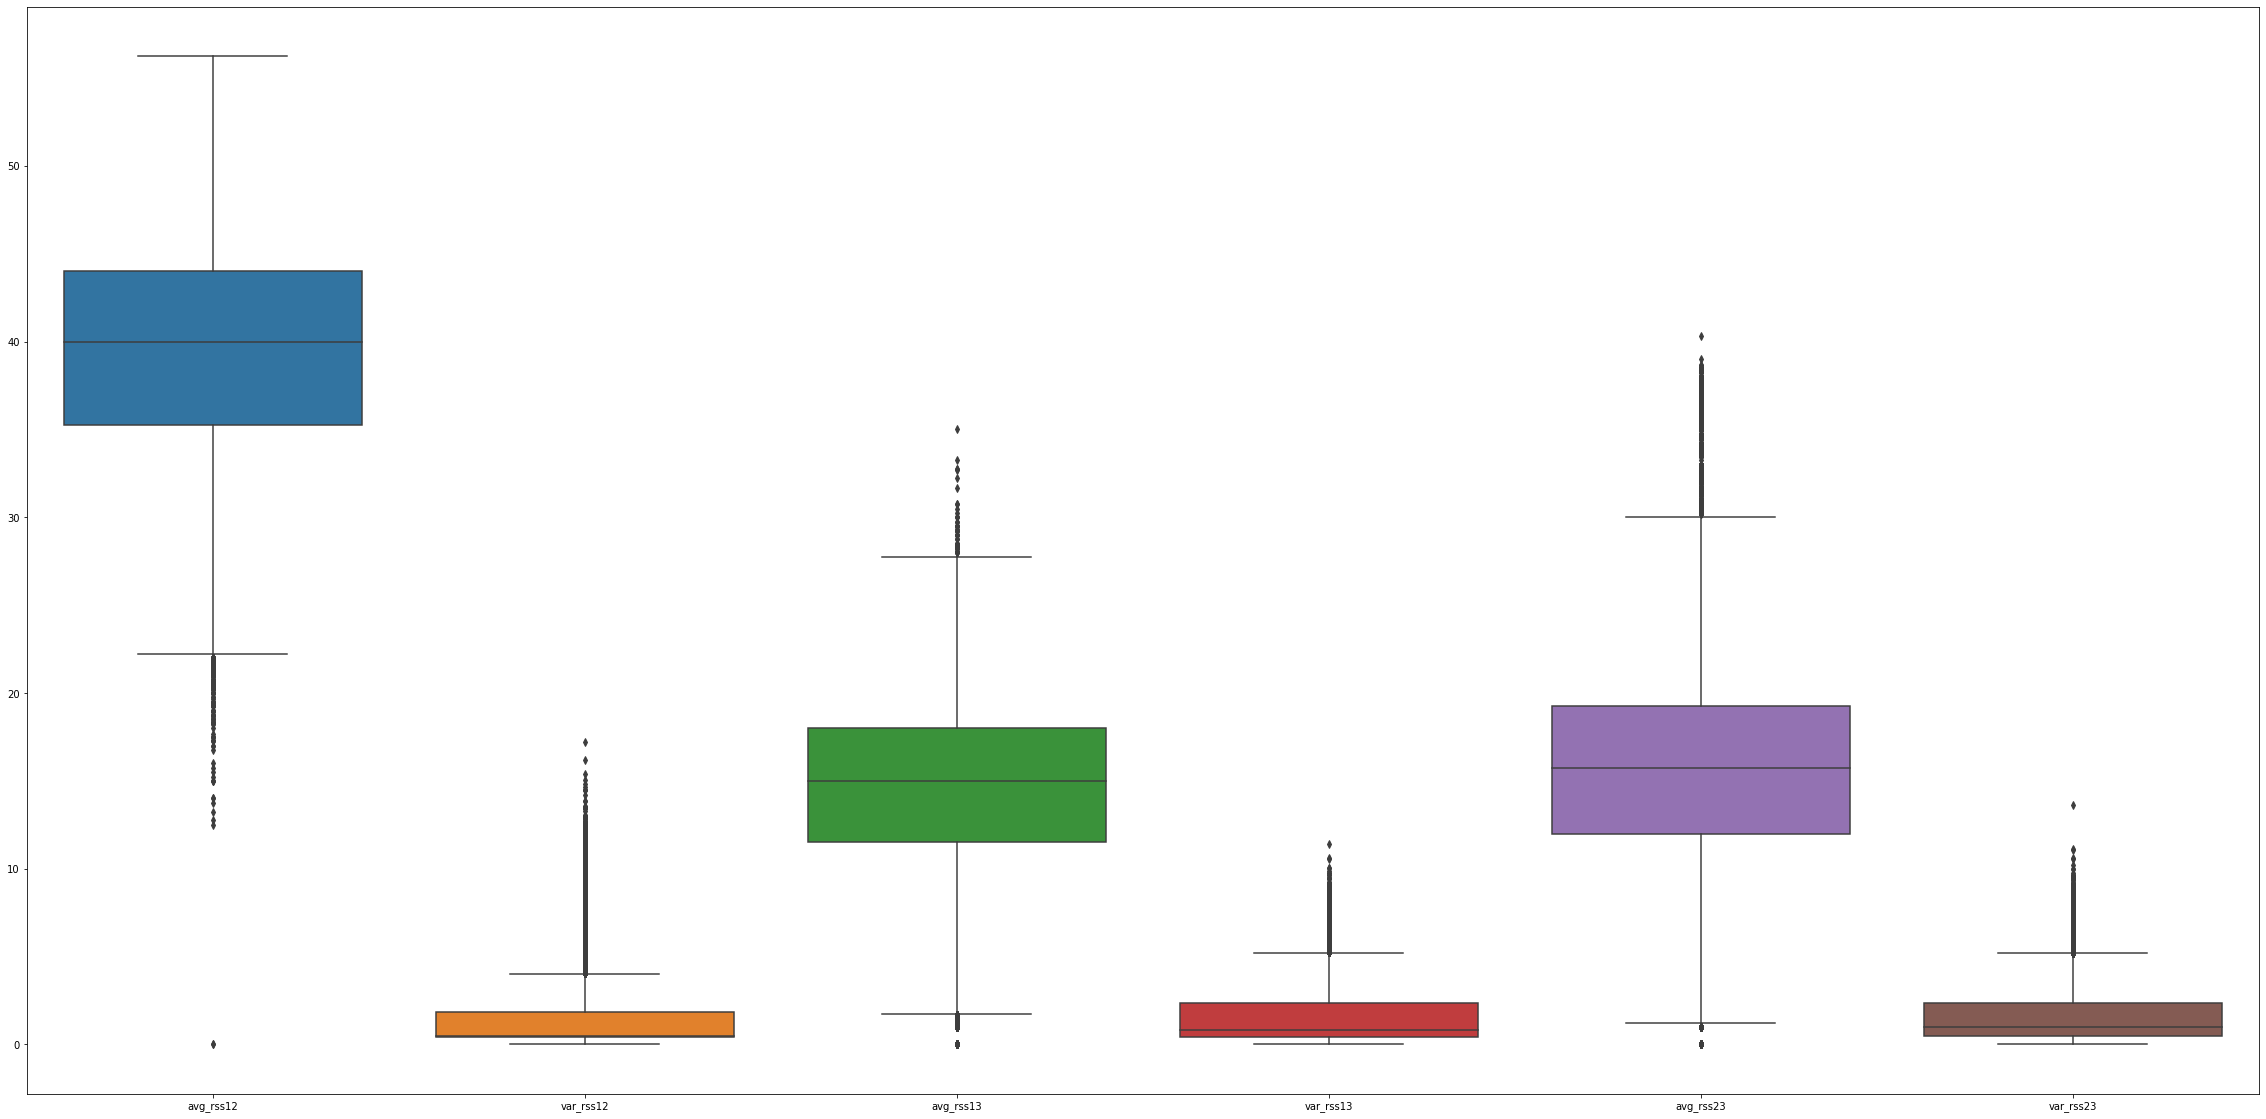

In [168]:
df=data.drop(columns=['time'])
fig ,ax  = plt.subplots(figsize = (40,20))
sns.boxplot(data = df , ax = ax)

In [169]:
df.shape

(41759, 7)

<AxesSubplot:>

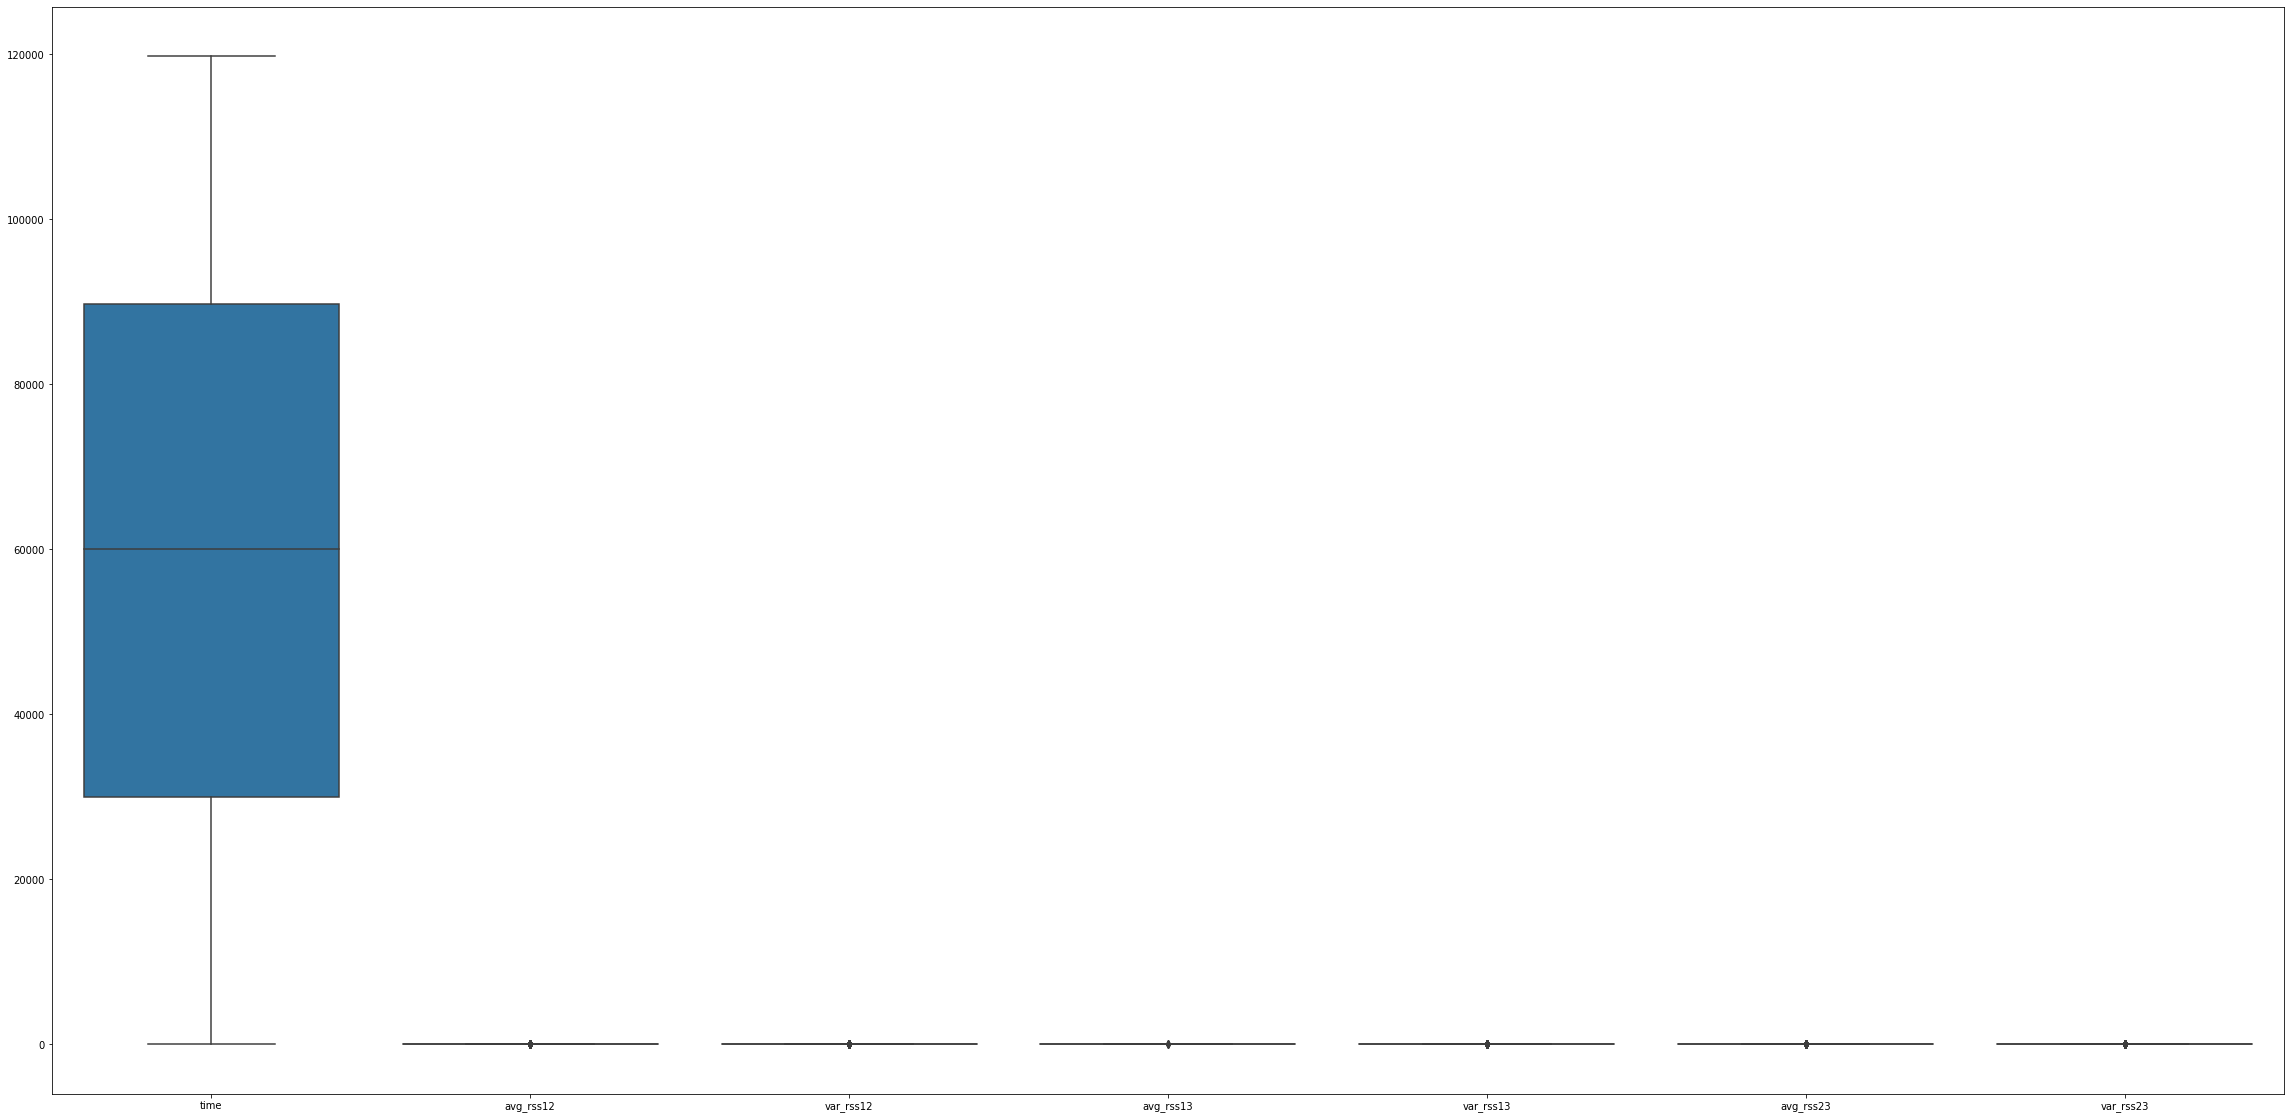

In [189]:
#df=data.drop(columns=['time'])
q = data['var_rss12'].quantile(.80)
data_new = data[data['var_rss12'] < q]

q = data_new['var_rss13'].quantile(.95)
data_new = data_new[data_new['var_rss13'] < q]

q = data_new['var_rss23'].quantile(.95)
data_new = data_new[data_new['var_rss23'] < q]

fig ,ax  = plt.subplots(figsize = (40,20))
sns.boxplot(data = data_new , ax = ax)

In [190]:
data_new.shape

(30120, 8)

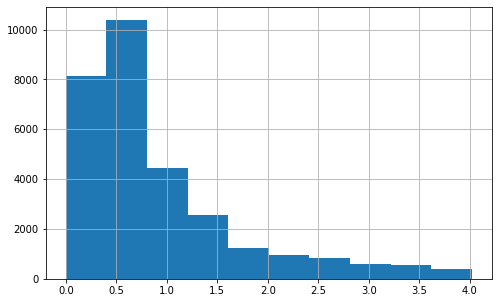

In [196]:
plt.figure(figsize=(8,5))
plt.hist(data_new['var_rss13'])
plt.grid()

<AxesSubplot:>

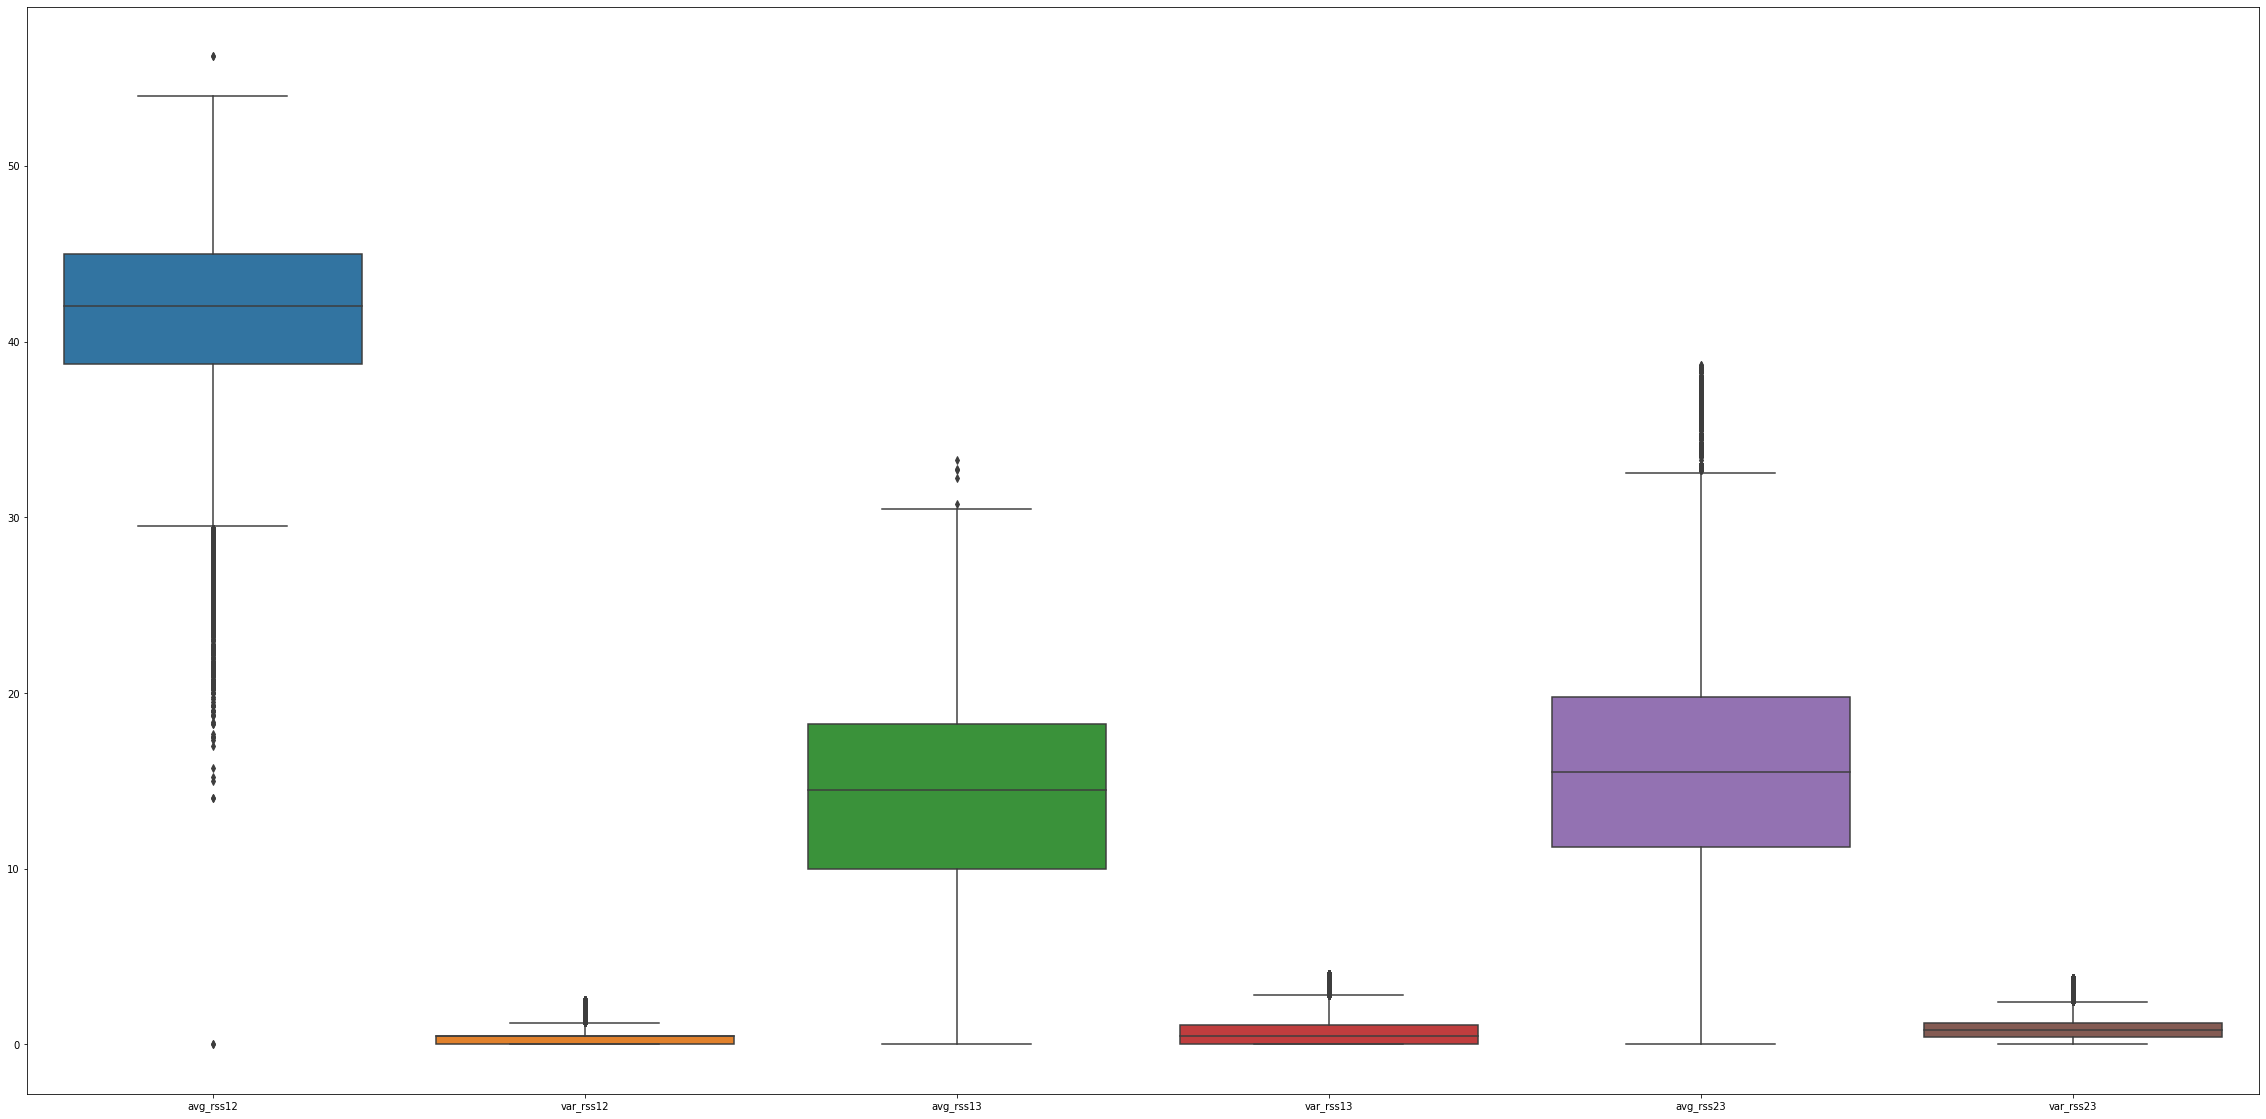

In [197]:
df=data_new.drop(columns=['time'])
fig ,ax  = plt.subplots(figsize = (40,20))
sns.boxplot(data = df , ax = ax)

## Model Building

In [200]:
y = data_new['label']
x = data_new.drop(columns=['label'])
x.head()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0      39.25       0.43      22.75       0.43      33.75        1.3
1   250      39.25       0.43      23.00       0.00      33.00        0.0
2   500      39.25       0.43      23.25       0.43      33.00        0.0
3   750      39.50       0.50      23.00       0.71      33.00        0.0
4  1000      39.50       0.50      24.00       0.00      33.00        0.0

In [201]:
y.head()

0    bending1
1    bending1
2    bending1
3    bending1
4    bending1
Name: label, dtype: object

In [204]:
scalar = StandardScaler()
#ProfileReport(pd.DataFrame(scalar.fit_transform(X)))
x_scaled = scalar.fit_transform(x)

In [207]:
x_scaled

array([[-1.73409365, -0.19543323, -0.13173276, ..., -0.42787155,
         2.33873522,  0.48914406],
       [-1.7268643 , -0.19543323, -0.13173276, ..., -0.91893974,
         2.24065442, -1.14953875],
       [-1.71963494, -0.19543323, -0.13173276, ..., -0.42787155,
         2.24065442, -1.14953875],
       ...,
       [ 1.5552622 , -1.51999608,  1.72551   , ...,  3.67197688,
        -0.96331816,  3.26229957],
       [ 1.56249155, -0.55667764,  1.36543232, ...,  2.41575592,
         0.05018337,  1.10680142],
       [ 1.59863832, -1.60027261,  0.70213134, ...,  1.92468772,
         0.34442575,  2.68245797]])

In [208]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [209]:
vif_score(x)

FEATURE  VIF_SCORE
0       time   1.000938
1  avg_rss12   1.062768
2  var_rss12   1.361695
3  avg_rss13   1.422647
4  var_rss13   1.440974
5  avg_rss23   1.409925
6  var_rss23   1.419746

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y , test_size = .20 , random_state = 144)

In [213]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24096, 7)
(6024, 7)
(24096,)
(6024,)


#### Model 1 (solver : 'liblinear')

In [214]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')
logr_liblinear.fit(x_train,y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [217]:
logr_liblinear.predict_proba([x_test[1]])

array([[0.71158975, 0.01657174, 0.11060512, 0.00448184, 0.11141071,
        0.03411698, 0.01122385]])

In [236]:
logr_liblinear.predict([x_test[1]])

array(['bending1'], dtype=object)

In [229]:
y_pred_liblinear = logr_liblinear.predict(x_test)

confusion_m1 = pd.crosstab(y_test,y_pred_liblinear)
confusion_m1

col_0     bending1  bending2  cycling  lying  sitting  standing  walking
label                                                                   
bending1       569         0        3      0       57        32        0
bending2        39       313       16     43       36        10        1
cycling          6         8      361      4       59        31        1
lying            1        27        6   1294        5        95        1
sitting         58       106       24    237      434       528        0
standing        10         0       22    202      246       945        0
walking          0         8      172      0        9         5        0

In [265]:
accuracy = (np.diag(confusion_m1).sum())*100/(confusion_m1.sum().sum())
accuracy

65.0066401062417

In [270]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_liblinear, output_dict=True)).T

precision    recall  f1-score      support
bending1       0.833089  0.860817  0.846726   661.000000
bending2       0.677489  0.683406  0.680435   458.000000
cycling        0.597682  0.768085  0.672253   470.000000
lying          0.726966  0.905528  0.806482  1429.000000
sitting        0.513002  0.312906  0.388715  1387.000000
standing       0.574119  0.663158  0.615435  1425.000000
walking        0.000000  0.000000  0.000000   194.000000
accuracy       0.650066  0.650066  0.650066     0.650066
macro avg      0.560335  0.599129  0.572864  6024.000000
weighted avg   0.615930  0.650066  0.623487  6024.000000

#### Model 2 (solver : 'lbfgs')

In [288]:
logr_lbfgs = LogisticRegression(verbose=1,solver='lbfgs')
logr_lbfgs.fit(x_train,y_train)

y_pred_lbfgs = logr_lbfgs.predict(x_test)

confusion_m2 = pd.crosstab(y_test,y_pred_lbfgs)
confusion_m2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


col_0     bending1  bending2  cycling  lying  sitting  standing  walking
label                                                                   
bending1       548         1       11      0       99         2        0
bending2        39       303       20     31       54         5        6
cycling          3         8      377      3       56        13       10
lying            1        32        2   1252       26       112        4
sitting         46        98       30    189      696       327        1
standing         5         0       19    138      392       870        1
walking          0         7      124      0        9         3       51

In [289]:
accuracy = (np.diag(confusion_m2).sum())*100/(confusion_m2.sum().sum())
accuracy

68.01128818061089

In [274]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_lbfgs, output_dict=True)).T

precision    recall  f1-score      support
bending1       0.853583  0.829047  0.841136   661.000000
bending2       0.674833  0.661572  0.668137   458.000000
cycling        0.646655  0.802128  0.716049   470.000000
lying          0.776193  0.876137  0.823143  1429.000000
sitting        0.522523  0.501802  0.511953  1387.000000
standing       0.653153  0.610526  0.631121  1425.000000
walking        0.698630  0.262887  0.382022   194.000000
accuracy       0.680113  0.680113  0.680113     0.680113
macro avg      0.689367  0.649157  0.653366  6024.000000
weighted avg   0.676862  0.680113  0.673697  6024.000000

#### Model 3 (solver : 'newton-cg')

In [275]:
logr_newton_cg = LogisticRegression(verbose=1,solver='newton-cg')
logr_newton_cg.fit(x_train,y_train)

y_pred_newton_cg = logr_newton_cg.predict(x_test)

confusion_m3 = pd.crosstab(y_test,y_pred_newton_cg)
confusion_m3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


col_0     bending1  bending2  cycling  lying  sitting  standing  walking
label                                                                   
bending1       548         1       11      0       99         2        0
bending2        39       303       20     31       54         5        6
cycling          3         8      377      3       56        13       10
lying            1        32        2   1252       26       112        4
sitting         46        98       30    189      696       327        1
standing         5         0       19    138      392       870        1
walking          0         7      124      0        9         3       51

In [277]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_newton_cg, output_dict=True)).T

precision    recall  f1-score      support
bending1       0.853583  0.829047  0.841136   661.000000
bending2       0.674833  0.661572  0.668137   458.000000
cycling        0.646655  0.802128  0.716049   470.000000
lying          0.776193  0.876137  0.823143  1429.000000
sitting        0.522523  0.501802  0.511953  1387.000000
standing       0.653153  0.610526  0.631121  1425.000000
walking        0.698630  0.262887  0.382022   194.000000
accuracy       0.680113  0.680113  0.680113     0.680113
macro avg      0.689367  0.649157  0.653366  6024.000000
weighted avg   0.676862  0.680113  0.673697  6024.000000

#### Model 4 (solver : 'sag')

In [278]:
logr_sag = LogisticRegression(verbose=1,solver='sag')
logr_sag.fit(x_train,y_train)

y_pred_sag = logr_sag.predict(x_test)

confusion_m4 = pd.crosstab(y_test,y_pred_sag)
confusion_m4

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 34 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


col_0     bending1  bending2  cycling  lying  sitting  standing  walking
label                                                                   
bending1       548         1       11      0       99         2        0
bending2        39       303       20     31       54         5        6
cycling          3         8      377      3       56        13       10
lying            1        32        2   1252       26       112        4
sitting         46        98       30    189      696       327        1
standing         5         0       19    138      392       870        1
walking          0         7      124      0        9         3       51

In [280]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_sag, output_dict=True)).T

precision    recall  f1-score      support
bending1       0.853583  0.829047  0.841136   661.000000
bending2       0.674833  0.661572  0.668137   458.000000
cycling        0.646655  0.802128  0.716049   470.000000
lying          0.776193  0.876137  0.823143  1429.000000
sitting        0.522523  0.501802  0.511953  1387.000000
standing       0.653153  0.610526  0.631121  1425.000000
walking        0.698630  0.262887  0.382022   194.000000
accuracy       0.680113  0.680113  0.680113     0.680113
macro avg      0.689367  0.649157  0.653366  6024.000000
weighted avg   0.676862  0.680113  0.673697  6024.000000

#### Model 5 (solver : 'saga')

In [281]:
logr_saga = LogisticRegression(verbose=1,solver='saga')
logr_saga.fit(x_train,y_train)

y_pred_saga = logr_saga.predict(x_test)

confusion_m5 = pd.crosstab(y_test,y_pred_saga)
confusion_m5

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 17 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


col_0     bending1  bending2  cycling  lying  sitting  standing  walking
label                                                                   
bending1       548         1       11      0       99         2        0
bending2        39       303       20     31       54         5        6
cycling          3         8      377      3       56        13       10
lying            1        32        2   1252       26       112        4
sitting         46        98       30    189      696       327        1
standing         5         0       19    138      392       870        1
walking          0         7      124      0        9         3       51

In [283]:
pd.DataFrame(metrics.classification_report(y_test,y_pred_saga, output_dict=True)).T

precision    recall  f1-score      support
bending1       0.853583  0.829047  0.841136   661.000000
bending2       0.674833  0.661572  0.668137   458.000000
cycling        0.646655  0.802128  0.716049   470.000000
lying          0.776193  0.876137  0.823143  1429.000000
sitting        0.522523  0.501802  0.511953  1387.000000
standing       0.653153  0.610526  0.631121  1425.000000
walking        0.698630  0.262887  0.382022   194.000000
accuracy       0.680113  0.680113  0.680113     0.680113
macro avg      0.689367  0.649157  0.653366  6024.000000
weighted avg   0.676862  0.680113  0.673697  6024.000000

##### All other 4 solvers('lbfgs', 'newton-cg', 'sag', 'saga') had similar performance metrics and performed better than 'liblinear' solver.